In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("data/Housing.csv")
# prikaz prvih 10 redova
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
# Lista varijabli za mapiranje

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Funkcija za mapiranje
def yes_no_map(x):
    return x.map({'yes': 1, "no": 0})

# Mapiranje podataka iz dataframe-a
data[varlist] = data[varlist].apply(yes_no_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
# Lista varijabli za mapiranje

varlist =  ['furnishingstatus']

# Funkcija za mapiranje
def furnishing_status_map(x):
    return x.map({'furnished': 2, "semi-furnished": 1, "unfurnished": 0})

# Mapiranje podataka iz dataframe-a
data[varlist] = data[varlist].apply(furnishing_status_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [5]:
## ONE-HOT encoding
# furnishing_status = pd.get_dummies(data['furnishingstatus'], drop_first = True)
# data = pd.concat([data, furnishing_status], axis = 1)

# data.drop(['furnishingstatus'], axis = 1, inplace = True)
# data.head()

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(f"Velicina trening skupa: {len(df_train)}")
print(f"Velician testnog skupa: {len(df_test)}")

Velicina trening skupa: 436
Velician testnog skupa: 109


In [7]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7525000,6000,3,2,4,1,0,0,0,1,1,0,2
1,6300000,7200,3,2,1,1,0,1,0,1,3,0,1
2,3920000,3816,2,1,1,1,0,1,0,1,2,0,2
3,3430000,2610,3,1,2,1,0,1,0,0,0,1,0
4,3010000,3750,3,1,2,1,0,0,0,0,0,0,0


In [8]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4060000,5900,4,2,2,0,0,1,0,0,1,0,0
1,6650000,6500,3,2,3,1,0,0,0,1,0,1,2
2,3710000,4040,2,1,1,1,0,0,0,0,0,0,1
3,6440000,5000,3,1,2,1,0,0,0,1,0,0,1
4,2800000,3960,3,1,1,1,0,0,0,0,0,0,2


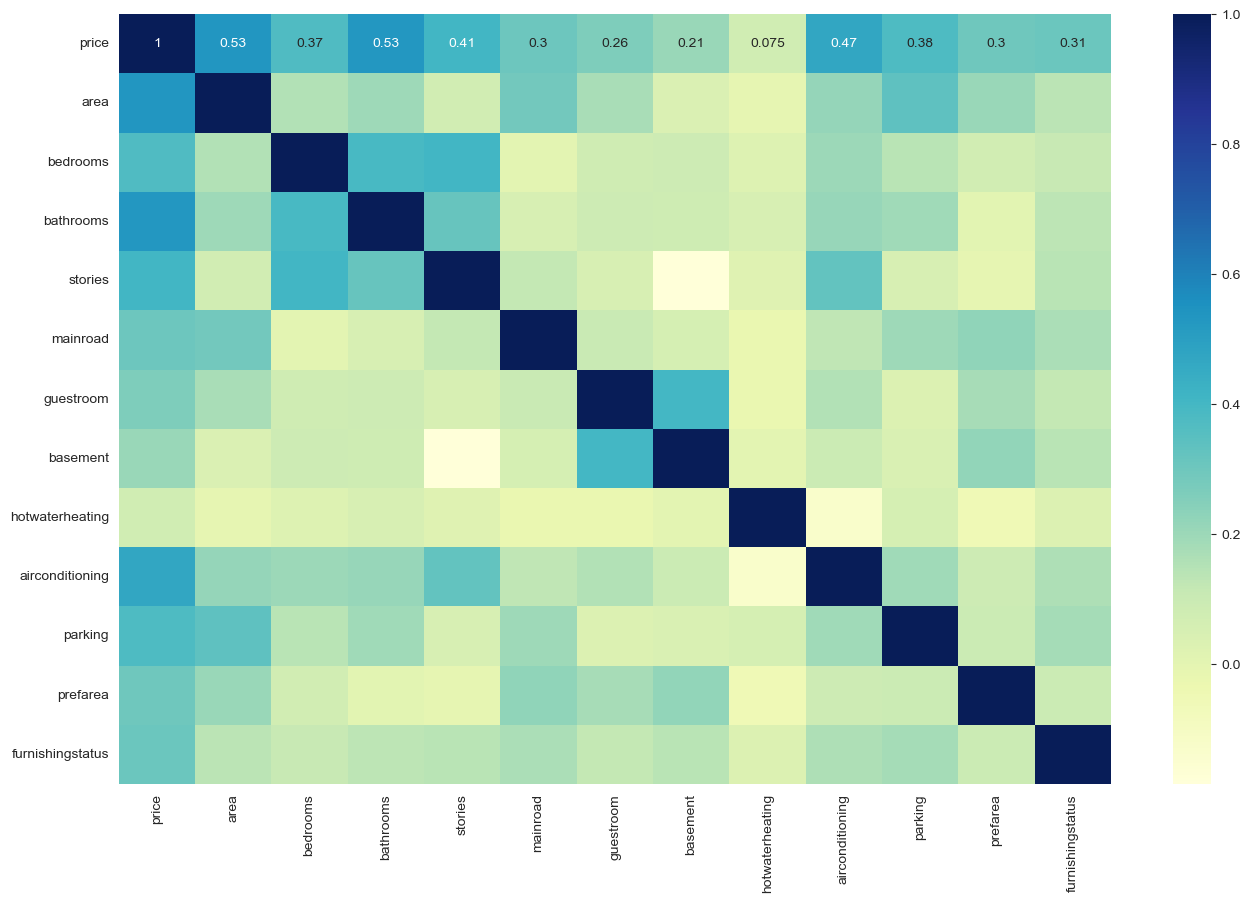

In [9]:
# Grafik prikazuje inearnu korelaciju svake dvije kolone

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [10]:
def df_to_matrix(df):
    return df.values

In [11]:
y_train = np.array(df_train.pop('price'))
X_train = df_to_matrix(df_train)

y_test = np.array(df_test.pop('price'))
X_test = df_to_matrix(df_test)

In [12]:
X_train

array([[6000,    3,    2, ...,    1,    0,    2],
       [7200,    3,    2, ...,    3,    0,    1],
       [3816,    2,    1, ...,    2,    0,    2],
       ...,
       [4500,    3,    2, ...,    1,    0,    2],
       [4040,    2,    1, ...,    0,    0,    0],
       [5500,    3,    2, ...,    1,    0,    1]])

In [13]:
y_train[:10]

array([7525000, 6300000, 3920000, 3430000, 3010000, 4620000, 1750000,
       3010000, 2520000, 3710000])

In [14]:
X_train.shape

(436, 12)

In [15]:
y_train.shape

(436,)

In [16]:
X_test

array([[5900,    4,    2, ...,    1,    0,    0],
       [6500,    3,    2, ...,    0,    1,    2],
       [4040,    2,    1, ...,    0,    0,    1],
       ...,
       [6000,    4,    2, ...,    1,    0,    1],
       [6000,    3,    2, ...,    1,    0,    1],
       [6100,    3,    2, ...,    2,    1,    2]])

In [17]:
y_test[:10]

array([4060000, 6650000, 3710000, 6440000, 2800000, 4900000, 5250000,
       4543000, 2450000, 3353000])

In [18]:
X_test.shape

(109, 12)

In [19]:
y_test.shape

(109,)

# Implementacija modela linearne regresije

In [20]:
# Linearna Regresija

class LinearnaRegresija():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # funkcija za treniranje modela sa inputom X i outputom y
    def train(self, X, Y):
        # broj podataka, broj featuresa
        self.n, self.d = X.shape
        # inicijalizacija tezina
        self.W = np.zeros(self.d)
        self.b = 0
        self.X = X
        self.Y = Y

        # ucenje pomocu gradijentnog spusta
        for i in range(self.iterations):
            self.update_weights()

        return self

    # funkcija za azuriranja tezina pomocu gradijentnog spusta
    def update_weights(self):
        Y_pred = self.predict(self.X)

        # izracunaj gradijente
        dW = - (2 * (self.X.T).dot(self.Y - Y_pred)) / self.n
        db = - 2 * np.sum(self.Y - Y_pred) / self.n

        # azuriraj tezine
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self

    # h(x) - hipoteticka funkcija
    def predict(self, X):
        return X.dot(self.W) + self.b

In [21]:
model = LinearnaRegresija(iterations=10000, learning_rate=1e-10 )
model.train(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred[:10]

array([5027599.30265349, 6033106.15076308, 3197552.32638819,
       2187012.28955063, 3142249.63371192, 4198041.21876466,
       3226042.46600343, 4253339.1766238 , 2664627.07637677,
       5044345.5942808 ])

In [22]:
from scipy import stats
errors = (abs(y_train_pred - y_train))
stats.describe(errors)

DescribeResult(nobs=436, minmax=(1381.4864985886961, 7346160.007904062), mean=1314218.1133072458, variance=1454901069476.287, skewness=1.7347641777526415, kurtosis=3.8146035695065903)

/var/folders/5j/h8jcn7rx63n551f1642_r1p80000gn/T/ipykernel_61902/700820854.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train_pred - y_train), bins = 20)
/Users/berinaspirjan/anaconda3/envs/pneumonia-detection-ml-with-react/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Greska')

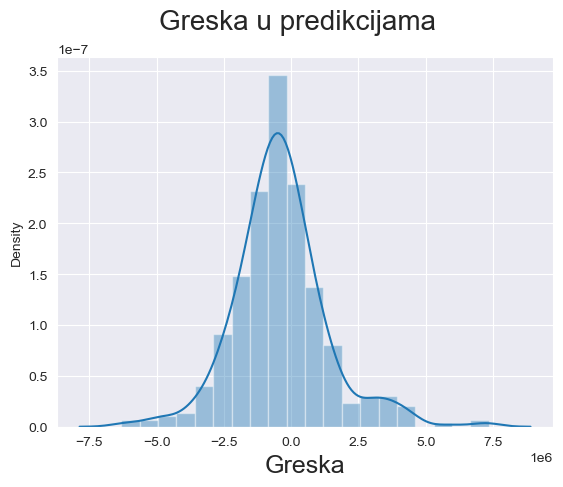

In [23]:
# histogram gresaka koje je model napravio (greska je u ovom slucaju razlika izmedju previdjenje cijene i prave cijene)
fig = plt.figure()
sns.distplot((y_train_pred - y_train), bins = 20)
fig.suptitle('Greska u predikcijama', fontsize = 20)                  # ime grafika
plt.xlabel('Greska', fontsize = 18)                                   # labela x-ose

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_train, y_train_pred))
print(mean_squared_error(y_train, y_train_pred))

1314218.1133072458
3178733389762.713


In [25]:
print("Trenirani parametar W:   ", model.W)
print("Trenirani parametar b:   ", model.b)

Trenirani parametar W:    [8.37928323e+02 3.25577153e+00 1.70260882e+00 2.62668930e+00
 7.86584241e-01 2.74497281e-01 6.03938811e-01 1.07442275e-01
 6.82422656e-01 7.15490723e-01 3.40023116e-01 1.29424090e+00]
Trenirani parametar b:    0.9128940289070018


# Predikcija na testnom skupu

In [26]:
indices = list(range(len(X_test)))
indices = sorted(indices, key=lambda i: y_test[i])

Predvidjena cijena kuce:  [4943801.02 5446560.46 3385244.26]
Prava cijena kuce:        [4060000 6650000 3710000]


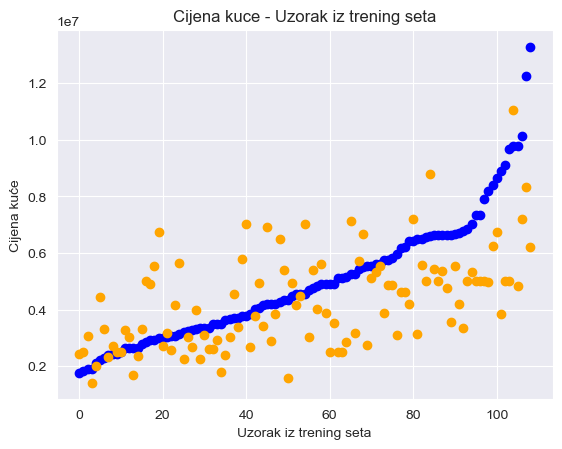

In [27]:
y_test_pred = model.predict( X_test )
print("Predvidjena cijena kuce: ", np.round(y_test_pred[:3], 2))
print("Prava cijena kuce:       ", y_test[:3])

# Vizualizacija na testnom skupu

plt.scatter(np.arange(len(X_test)), y_test[indices], color='blue')
plt.scatter(np.arange(len(X_test)), y_test_pred[indices], color='orange')
plt.title('Cijena kuce - Uzorak iz trening seta')
plt.xlabel('Uzorak iz trening seta')
plt.ylabel('Cijena kuće')
plt.show()

In [28]:
from scipy import stats
errors = (abs(y_test_pred - y_test))
stats.describe(errors)

DescribeResult(nobs=109, minmax=(6197.275764145888, 7082540.794210993), mean=1575076.5254096487, variance=1601961397184.7778, skewness=1.3410640565706387, kurtosis=2.5725040929332863)

/var/folders/5j/h8jcn7rx63n551f1642_r1p80000gn/T/ipykernel_61902/2299135847.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_test_pred), bins = 20)
/Users/berinaspirjan/anaconda3/envs/pneumonia-detection-ml-with-react/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Greska')

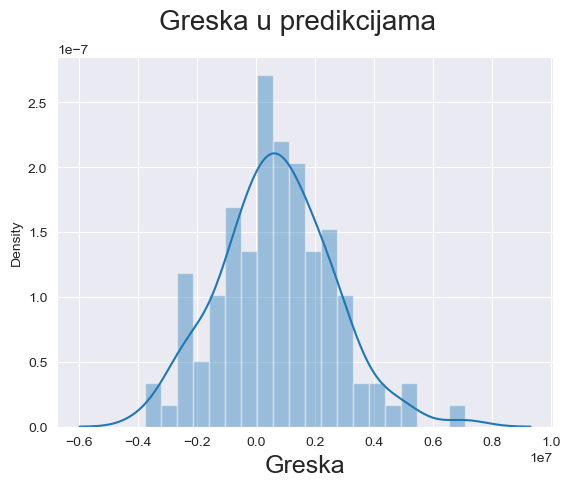

In [29]:
# histogram gresaka koje je model napravio (greska je u ovom slucaju razlika izmedju previdjenje cijene i prave cijene)
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Greska u predikcijama', fontsize = 20)                  # ime grafika
plt.xlabel('Greska', fontsize = 18)                                   # labela x-ose

# Korištenje LinearRegression modela iz sklearn biblioteke

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train) # treniranje modela pogledati: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

LinearRegression()

Pogledati i https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [31]:
y_sklearn_train_pred = lm.predict(X_train)
y_sklearn_train_pred[:10]

array([7141157.65285394, 6839782.3740179 , 4850618.97604656,
       4023026.83117536, 3268832.99144208, 4169559.34089253,
       3292417.8686209 , 2808521.10597778, 2361351.83466748,
       3608383.65720983])

In [32]:
from scipy import stats
errors = (abs(y_sklearn_train_pred - y_train))
stats.describe(errors)

DescribeResult(nobs=436, minmax=(957.0591237265617, 4912863.135564353), mean=718146.5977537858, variance=455212347850.98047, skewness=2.0684720791740054, kurtosis=6.348949408425909)

/var/folders/5j/h8jcn7rx63n551f1642_r1p80000gn/T/ipykernel_61902/1721856633.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_sklearn_train_pred), bins = 20)
/Users/berinaspirjan/anaconda3/envs/pneumonia-detection-ml-with-react/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Greska')

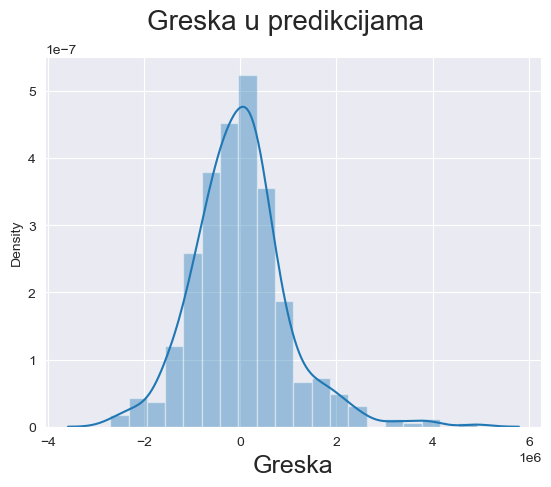

In [33]:
# histogram gresaka koje je model napravio (greska je u ovom slucaju razlika izmedju previdjenje cijene i prave cijene)
fig = plt.figure()
sns.distplot((y_train - y_sklearn_train_pred), bins = 20)
fig.suptitle('Greska u predikcijama', fontsize = 20)                  # ime grafika
plt.xlabel('Greska', fontsize = 18)                                   # labela x-ose

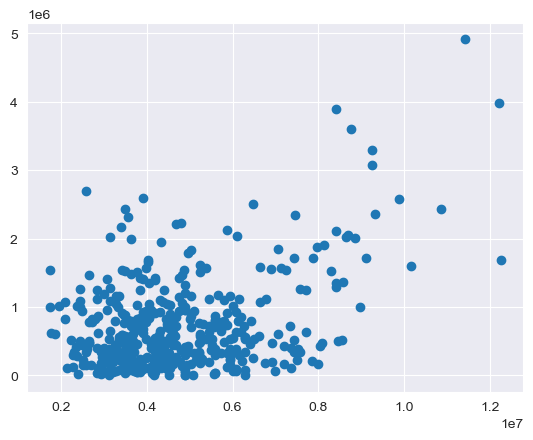

In [34]:
# x-osa je cijena kuca, y-osa je greska koju je model napravio
plt.scatter(y_train, errors)
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, y_sklearn_train_pred)

718146.5977537858

# Predikcija na testnom skupu

In [36]:
y_sklearn_test_pred = lm.predict(X_test)

In [37]:
from scipy import stats
errors = (abs(y_sklearn_test_pred - y_test))
stats.describe(errors)

DescribeResult(nobs=109, minmax=(7736.005615291651, 5295927.588459995), mean=979679.6912959903, variance=819497141454.8966, skewness=2.2128206688857612, kurtosis=6.7495659219934865)

/var/folders/5j/h8jcn7rx63n551f1642_r1p80000gn/T/ipykernel_61902/2265657622.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_sklearn_test_pred), bins = 20)
/Users/berinaspirjan/anaconda3/envs/pneumonia-detection-ml-with-react/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Greska')

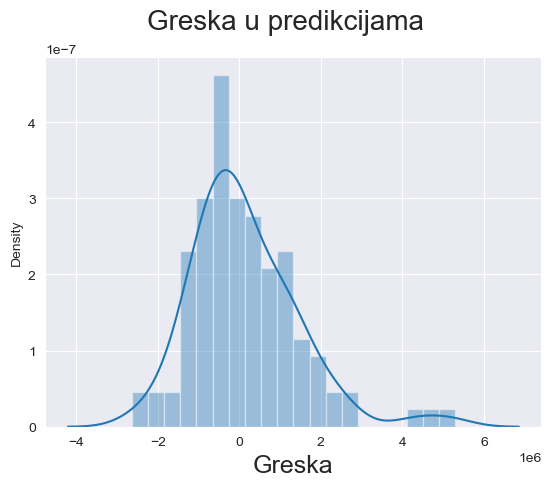

In [38]:
# histogram gresaka koje je model napravio (greska je u ovom slucaju razlika izmedju previdjenje cijene i prave cijene)
fig = plt.figure()
sns.distplot((y_test - y_sklearn_test_pred), bins = 20)
fig.suptitle('Greska u predikcijama', fontsize = 20)                  # ime grafika
plt.xlabel('Greska', fontsize = 18)                                   # labela x-ose

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_sklearn_test_pred)

979679.6912959903

Text(0, 0.5, 'y_sklearn_test_pred')

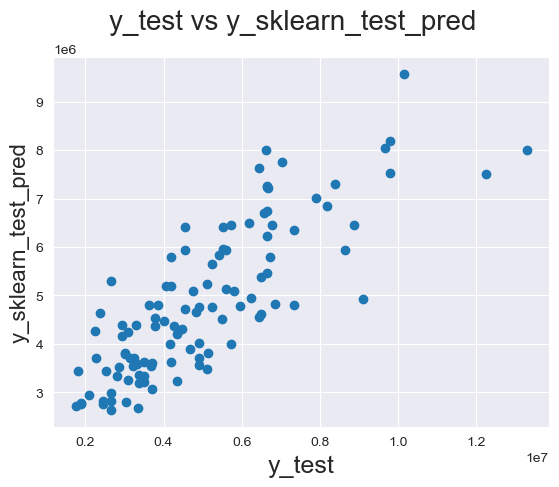

In [40]:
# x-osa je prava cijena kuce, y-osa je predvidjanje cijene kuce pomocu modela
fig = plt.figure()
plt.scatter(y_test, y_sklearn_test_pred)
fig.suptitle('y_test vs y_sklearn_test_pred', fontsize=20)              # ime grafika
plt.xlabel('y_test', fontsize=18)                          # labela x-ose
plt.ylabel('y_sklearn_test_pred', fontsize=16)                     # labela y-ose

# Sklearn model protiv našeg modela

In [41]:
indices = list(range(len(X_test)))
indices = sorted(indices, key=lambda i: y_test[i])

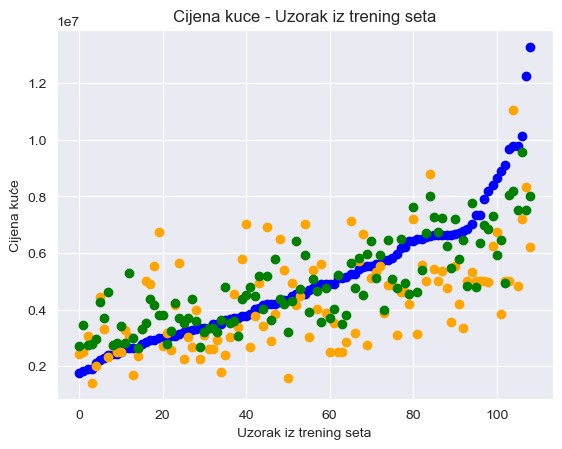

In [42]:
# Vizualizacija na testnom skupu

plt.scatter(np.arange(len(X_test)), y_test[indices], color='blue')
plt.scatter(np.arange(len(X_test)), y_test_pred[indices], color='orange')
plt.scatter(np.arange(len(X_test)), y_sklearn_test_pred[indices], color='green')

plt.title('Cijena kuce - Uzorak iz trening seta')
plt.xlabel('Uzorak iz trening seta')
plt.ylabel('Cijena kuće')
plt.show()

In [43]:
print("Trening skup - apsolutna greska")
print(f"Sklearn model: {mean_absolute_error(y_train, y_sklearn_train_pred)}")
print(f"Nas model: {mean_absolute_error(y_train, y_train_pred)}")
print("Testni skup - apsolutna greska")
print(f"Sklearn model: {mean_absolute_error(y_test, y_sklearn_test_pred)}")
print(f"Nas model: {mean_absolute_error(y_test, y_test_pred)}")


Trening skup - apsolutna greska
Sklearn model: 718146.5977537858
Nas model: 1314218.1133072458
Testni skup - apsolutna greska
Sklearn model: 979679.6912959903
Nas model: 1575076.5254096487


# Skaliranje - normalizacija i standardizacija podataka

## Standardizacija

In [44]:
# Skaliranja feature-sa (standardizacija)
from sklearn.preprocessing import StandardScaler

train_std_scaler = StandardScaler()

X_train_std = train_std_scaler.fit_transform(X_train)
print(X_train_std.shape)
print(np.mean(X_train_std, axis=0))
print(np.std(X_train_std, axis=0))

X_test_std = train_std_scaler.transform(X_test)
print(X_test_std.shape)
print(np.mean(X_test_std, axis=0))
print(np.std(X_test_std, axis=0))

(436, 12)
[ 1.22226388e-16  1.62968517e-16  7.33358328e-17  6.92616199e-17
  1.71116943e-16  9.77811104e-17 -6.51874070e-17 -4.88905552e-17
  0.00000000e+00 -6.51874070e-17 -4.07421293e-18  0.00000000e+00]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(109, 12)
[-0.00818248  0.04298849  0.21163632  0.13647344  0.01313404 -0.01196854
 -0.0765559  -0.10478244  0.08947808  0.04565885  0.01083569 -0.06711436]
[0.92105917 0.93346443 1.22712269 1.04766086 0.98636556 0.98984965
 0.97402153 0.7474154  1.03282108 1.03860155 1.00672857 1.05579026]


In [45]:
print("Nas model")

model = LinearnaRegresija(iterations=100000, learning_rate=1e-2)
model.train(X_train_std, y_train)

y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

print()

print("Sklearn model")

lm = LinearRegression()
lm.fit(X_train_std, y_train)

y_train_pred = lm.predict(X_train_std)
y_test_pred = lm.predict(X_test_std)

print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

Nas model
718146.5977537849
979679.6912959896

Sklearn model
718146.5977537853
979679.6912959907


## *Normalizacija*

In [46]:
from sklearn.preprocessing import MinMaxScaler

train_minmax_scaler = MinMaxScaler()

X_train_minmax = train_minmax_scaler.fit_transform(X_train)
print(X_train_std.shape)
print(np.min(X_train_minmax, axis=0))
print(np.max(X_train_minmax, axis=0))

X_test_minmax = train_std_scaler.transform(X_test)
print(X_test_std.shape)
print(np.min(X_test_minmax, axis=0))
print(np.max(X_test_minmax, axis=0))

(436, 12)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(109, 12)
[-1.5687933  -1.28351359 -0.5579503  -0.91249891 -2.45606557 -0.46677307
 -0.74642003 -0.23052136 -0.66611456 -0.80305867 -0.55262032 -1.25076755]
[3.65424324 2.73283993 3.63629675 2.58764353 0.40715525 2.14236869
 1.33972825 4.33799283 1.50124327 2.70998729 1.80956067 1.40940148]


In [47]:
print("Nas model")

model = LinearnaRegresija(iterations=100000, learning_rate=1e-2)
model.train(X_train_minmax, y_train)

y_train_pred = model.predict(X_train_minmax)
y_test_pred = model.predict(X_test_minmax)

print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

print()

print("Sklearn model")

lm = LinearRegression()
lm.fit(X_train_minmax, y_train)

y_train_pred = lm.predict(X_train_minmax)
y_test_pred = lm.predict(X_test_minmax)

print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

Nas model
718146.5977539266
5494196.873459905

Sklearn model
718146.5977537853
5494196.873461276


## *Robust scaler*

In [48]:
from sklearn.preprocessing import RobustScaler

train_robust_scaler = RobustScaler()

X_train_robust = train_robust_scaler.fit_transform(X_train)
print(X_train_robust.shape)
print(np.mean(X_train_robust, axis=0))
print(np.std(X_train_robust, axis=0))
print(np.min(X_train_robust, axis=0))
print(np.max(X_train_robust, axis=0))

X_test_robust = train_robust_scaler.transform(X_test)
print(X_test_robust.shape)
print(np.mean(X_test_robust, axis=0))
print(np.std(X_test_robust, axis=0))
print(np.min(X_test_robust, axis=0))
print(np.max(X_test_robust, axis=0))

(436, 12)
[ 0.23700888 -0.0412844   0.26605505 -0.21788991 -0.14220183  0.17889908
  0.35779817  0.05045872  0.30733945  0.68577982  0.23394495 -0.02981651]
[0.79774795 0.7469462  0.47684363 0.85710797 0.34925703 0.38326779
 0.47935231 0.21888955 0.46139128 0.85395979 0.42333759 0.37591596]
[-1.0326087 -2.         0.        -1.        -1.         0.
  0.         0.         0.         0.         0.        -0.5      ]
[4.23913043 3.         3.         2.         0.         1.
 1.         1.         1.         3.         1.         0.5       ]
(109, 12)
[ 0.23048132 -0.00917431  0.36697248 -0.10091743 -0.13761468  0.17431193
  0.32110092  0.02752294  0.34862385  0.72477064  0.23853211 -0.05504587]
[0.73477306 0.69724771 0.58514564 0.89795848 0.34449511 0.37937749
 0.46689947 0.16360142 0.47653464 0.88692397 0.42618604 0.39688841]
[-1.01449275 -1.          0.         -1.         -1.          0.
  0.          0.          0.          0.          0.         -0.5       ]
[3.15217391 2.        

In [49]:
print("Nas model")

model = LinearnaRegresija(iterations=100000, learning_rate=1e-1)
model.train(X_train_robust, y_train)

y_train_pred = model.predict(X_train_robust)
y_test_pred = model.predict(X_test_robust)

print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

print()

print("Sklearn model")

lm = LinearRegression()
lm.fit(X_train_robust, y_train)

y_train_pred = lm.predict(X_train_robust)
y_test_pred = lm.predict(X_test_robust)

print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

Nas model
718146.5977537851
979679.6912959914

Sklearn model
718146.5977537853
979679.6912959907


Pogledati https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-robust-scaler-section

# Selekcija feature-sa

Discarded features:  []
Discarded features:  ['bedrooms']
bedrooms - with rank 2
Discarded features:  ['bedrooms' 'guestroom']
bedrooms - with rank 3
guestroom - with rank 2
Discarded features:  ['bedrooms' 'mainroad' 'guestroom']
bedrooms - with rank 4
mainroad - with rank 2
guestroom - with rank 3
Discarded features:  ['bedrooms' 'mainroad' 'guestroom' 'hotwaterheating']
bedrooms - with rank 5
mainroad - with rank 3
guestroom - with rank 4
hotwaterheating - with rank 2
Discarded features:  ['bedrooms' 'mainroad' 'guestroom' 'hotwaterheating' 'furnishingstatus']
bedrooms - with rank 6
mainroad - with rank 4
guestroom - with rank 5
hotwaterheating - with rank 3
furnishingstatus - with rank 2
Discarded features:  ['bedrooms' 'mainroad' 'guestroom' 'hotwaterheating' 'parking'
 'furnishingstatus']
bedrooms - with rank 7
mainroad - with rank 5
guestroom - with rank 6
hotwaterheating - with rank 4
parking - with rank 2
furnishingstatus - with rank 3
Discarded features:  ['bedrooms' 'mainroa

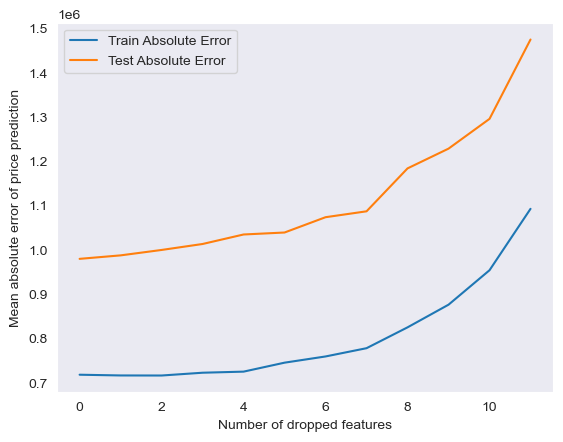

In [50]:
from sklearn.feature_selection import RFE

train_errors = []
test_errors =[]

num_features = X_train.shape[1]

for i in range(num_features):
    lm1 = LinearRegression()
    rfe = RFE(lm1, n_features_to_select=num_features-i)             # running RFE
    rfe = rfe.fit(X_train_std, y_train)

    discarded_features = np.array(df_train.columns)[~rfe.get_support()]
    discarded_feautre_ranks = np.array(rfe.ranking_)[~rfe.get_support()]

    print("Discarded features: ", discarded_features)
    for i, feature in enumerate(discarded_features):
        print(f"{feature} - with rank {discarded_feautre_ranks[i]}")

    pred_train = rfe.predict(X_train_std)
    pred_test = rfe.predict(X_test_std)

    train_errors.append(mean_absolute_error(y_train, pred_train))
    test_errors.append(mean_absolute_error(y_test, pred_test))

plt.plot(train_errors, label='Train Absolute Error')
plt.plot(test_errors, label='Test Absolute Error')
plt.xlabel("Number of dropped features")
plt.ylabel("Mean absolute error of price prediction")
plt.legend()
plt.grid()
plt.show()